<div class="alert alert-success" role="alert">
  <h1 class="alert-heading">Selección de Variables</h1>
  <h3 class="alert-heading">Prof. Enrique Mejía Ospino, emejia@uis.edu.co</h3>
  <h4 class="alert-heading">Escuela de Química</h4>
  <h5 class="alert-heading">Universidad Industrial de Santander</h5>
  <p>
  </div>

In [20]:
%matplotlib inline
import pandas as pd
import numpy as np
import itertools
import time
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
import statsmodels.formula.api as smf
import scipy.stats as scs
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict, KFold, RepeatedKFold, StratifiedKFold, train_test_split, cross_validate, cross_val_score
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn import preprocessing
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler  

In [6]:
diabetes = datasets.load_diabetes()
X = diabetes.data[:300]
y = diabetes.target[:300]
diabetes['feature_names']
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

<font color=red> **Convertimos los datos a DataFrame.** 

In [15]:
x=pd.DataFrame(X)
x_var=x.set_axis(diabetes['feature_names'], axis=1).astype('float64')
#X_ = X.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')
y=pd.DataFrame(y)
y=y.set_axis(['R'], axis=1)
x_var

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
295,-0.052738,0.050680,0.039062,-0.040099,-0.005697,-0.012900,0.011824,-0.039493,0.016307,0.003064
296,0.067136,-0.044642,-0.061174,-0.040099,-0.026336,-0.024487,0.033914,-0.039493,-0.056153,-0.059067
297,0.001751,-0.044642,-0.008362,-0.064199,-0.038720,-0.024487,0.004460,-0.039493,-0.064685,-0.054925
298,0.023546,0.050680,-0.037463,-0.046985,-0.091006,-0.075530,-0.032356,-0.039493,-0.030748,-0.013504


In [45]:
x_train, x_test, y_train, y_test = train_test_split(x_var, y, train_size=0.8, random_state=42, shuffle= True)
#m_svr = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
m_svr = LinearRegression()
m_svr.fit(x_train, y_train.values.ravel())
y_pred_train = m_svr.predict(x_train)
y_pred_test = m_svr.predict(x_test)

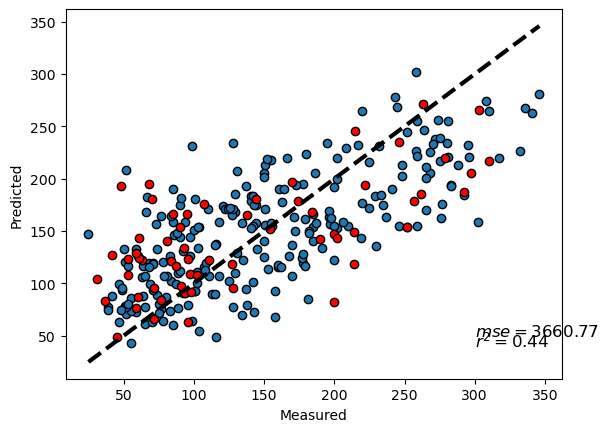

In [47]:
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred_train, edgecolors=(0, 0, 0))
ax.scatter(y_test, y_pred_test, color='red', edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=3)
ax.text(300,50, r"$mse = "+str(round(mean_squared_error(y_test, y_pred_test), 2))+r"$", fontsize=12, color="black")
ax.text(300,40, r"$r^2 = "+str(round(r2_score(y_test, y_pred_test), 2))+r"$", fontsize=12, color="black")
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [31]:
# Todas la columnas (excepto Prop, que es la variable respuesta)
model = sm.OLS.from_formula('y ~ ' + '+'.join(x_var.columns.difference([''])), x_var)
result = model.fit()
print (result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     30.65
Date:                Wed, 13 Nov 2024   Prob (F-statistic):           5.92e-40
Time:                        16:53:58   Log-Likelihood:                -1622.7
No. Observations:                 300   AIC:                             3267.
Df Residuals:                     289   BIC:                             3308.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.3478      3.196     47.671      0.0

In [33]:
# Todas la columnas (excepto Prop, que es la variable respuesta)
model = sm.OLS.from_formula('y ~ ' + '+'.join(x_var.columns.difference(['age', 's1', 's6'])), x_var)
result = model.fit()
print (result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     43.54
Date:                Wed, 13 Nov 2024   Prob (F-statistic):           7.23e-42
Time:                        16:54:22   Log-Likelihood:                -1624.0
No. Observations:                 300   AIC:                             3264.
Df Residuals:                     292   BIC:                             3294.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.4108      3.185     47.853      0.0

<font color=red> **Realizamos una combinatoria para escoger un número diferente de variables.** 

In [35]:
xsel1=[]
for i in range(1,10):
    for x_sel in itertools.combinations(x_var.columns, i):
        #print(x_sel)
        xsel1.append(x_sel)

In [37]:
len(xsel1)

1022

In [88]:
from sklearn.metrics import mean_squared_error, r2_score
def optimise_sel(X, y, xt):
    
    # Definimos el modelo lineal
    reg_sel = LinearRegression()
    
    reg_sel.fit(X, y)
    y_pred1 = reg_sel.predict(xt)
    # Calculamos métricas
    r2 = r2_score(y_test, y_pred1)
    mse = mean_squared_error(y_test, y_pred1)
    rpd = y.std()/np.sqrt(mse)
    
    return (y_pred1, r2, mse, rpd)

In [90]:
# probamos todas las posibilidades
r2s = []
mses = []
rpds = []
yp1 = []
xsel = []
for k in range(1, 10):
    for x_sel in itertools.combinations(x_var.columns, k):
        x_train, x_test, y_train, y_test = train_test_split(x_var[list(x_sel)], y, train_size=0.8, random_state=42, shuffle= True)
        y_pred1, r2, mse, rpd = optimise_sel(x_train, y_train, x_test)
        xsel.append(x_sel)
        r2s.append(r2)
        mses.append(mse)
        rpds.append(rpd)
        yp1.append(y_pred1)

In [94]:
#r2s[mses.index(min(mses))]
#mses.index(min(mses))
#x_var[list(xsel[r2s.index(max(r2s))])]

xb = x_var[list(xsel[mses.index(min(mses))])]

In [92]:
min(mses)

3379.572379893224

In [98]:
x_train, x_test, y_train, y_test = train_test_split(xb, y, train_size=0.8, random_state=42, shuffle= True)
#m_svr = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
m_svr = LinearRegression()
m_svr.fit(x_train, y_train.values.ravel())
y_pred_train = m_svr.predict(x_train)
y_pred_test = m_svr.predict(x_test)
mean_squared_error(y_test, y_pred_test)

3379.572379893224

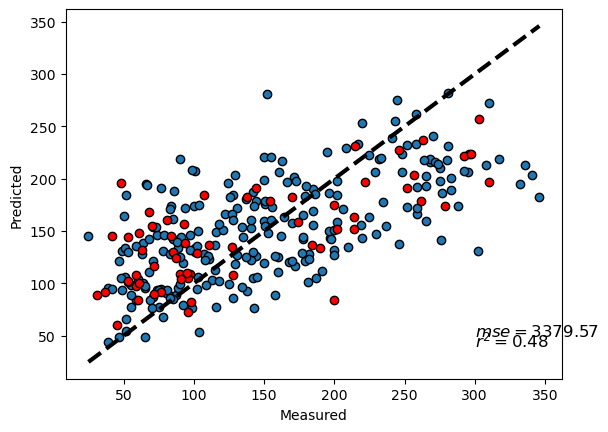

In [100]:
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred_train, edgecolors=(0, 0, 0))
ax.scatter(y_test, y_pred_test, color='red', edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=3)
ax.text(300,50, r"$mse = "+str(round(mean_squared_error(y_test, y_pred_test), 2))+r"$", fontsize=12, color="black")
ax.text(300,40, r"$r^2 = "+str(round(r2_score(y_test, y_pred_test), 2))+r"$", fontsize=12, color="black")
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

<font color=red> **Tratemos con otros datos.** 

In [102]:
url ='https://github.com/jbrownlee/Datasets/raw/master/pima-indians-diabetes.data.csv'
var = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv(url, names=var)
data

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


For Each Attribute: (all numeric-valued)
   1. Number of times pregnant
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   3. Diastolic blood pressure (mm Hg)
   4. Triceps skin fold thickness (mm)
   5. 2-Hour serum insulin (mu U/ml)
   6. Body mass index (weight in kg/(height in m)^2)
   7. Diabetes pedigree function
   8. Age (years)
   9. Class variable (0 or 1)

8. Missing Attribute Values: Yes

9. Class Distribution: (class value 1 is interpreted as "tested positive for
   diabetes")

   Class Value  Number of instances
   0            500
   1            268

In [104]:
x_var = (data[['preg','plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']]).astype('float64')
y = data[['class']]
x_var

,preg,plas,pres,skin,test,mass,pedi,age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0


In [110]:
D = pd.read_csv("./Datos/heart_failure_clinical_records_dataset.csv")
names_var = D.columns
names_var = list(names_var)
#allfeats.remove("time")
names_var.remove("DEATH_EVENT")
names_var.remove("time")
catcols = ["anaemia", "diabetes", "high_blood_pressure", "sex", "smoking"]
# for c in catcols:
#   D[c] = D[c].astype("category")
numcols = set(names_var) - set(catcols)
numcols = list(numcols)
#numcols.remove("DEATH_EVENT")
print(numcols, catcols)

D["time"].describe()

['age', 'serum_sodium', 'platelets', 'ejection_fraction', 'serum_creatinine', 'creatinine_phosphokinase'] ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']


count    299.000000
mean     130.260870
std       77.614208
min        4.000000
25%       73.000000
50%      115.000000
75%      203.000000
max      285.000000
Name: time, dtype: float64

In [112]:
from sklearn.preprocessing import * 

for col in numcols: 
    scaler = MinMaxScaler()
    D[col] = scaler.fit_transform(D[col].values.reshape(-1,1))

In [114]:
D[names_var]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
0,0.636364,0,0.071319,0,0.090909,1,0.290823,0.157303,0.485714,1,0
1,0.272727,0,1.000000,0,0.363636,0,0.288833,0.067416,0.657143,1,0
2,0.454545,0,0.015693,0,0.090909,0,0.165960,0.089888,0.457143,1,1
3,0.181818,1,0.011227,0,0.090909,0,0.224148,0.157303,0.685714,1,0
4,0.454545,1,0.017479,1,0.090909,0,0.365984,0.247191,0.085714,0,0
...,...,...,...,...,...,...,...,...,...,...,...
294,0.400000,0,0.004848,1,0.363636,1,0.157474,0.067416,0.857143,1,1
295,0.272727,0,0.229268,0,0.363636,0,0.296884,0.078652,0.742857,0,0
296,0.090909,0,0.259888,1,0.696970,0,0.869075,0.033708,0.714286,0,0
297,0.090909,0,0.304925,0,0.363636,0,0.139290,0.101124,0.771429,1,1


In [116]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold, cross_validate, cross_val_score
reg = linear_model.Ridge(alpha=.5)
X = D[names_var] ; y = D["DEATH_EVENT"].values
reg.fit(X, y)
mse = mean_squared_error(y, reg.predict(X))
print(mse)

0.16674294640807724


In [32]:
x_var=D[names_var]; y = D["DEATH_EVENT"].values

In [118]:
from sklearn.metrics import mean_squared_error, r2_score
def optimise_sel(X, y):
    
    # Definimos el modelo lineal
    reg_sel = linear_model.Ridge(alpha=.5)
    
    reg_sel.fit(X, y)
    y_pred1 = reg_sel.predict(X)
    # Calculamos métricas
    r2 = r2_score(y, y_pred1)
    mse = mean_squared_error(y, y_pred1)
    rpd = y.std()/np.sqrt(mse)
    
    return (y_pred1, r2, mse, rpd)

In [120]:
# probamos todas las posibilidades
r2s = []
mses = []
rpds = []
yp1 = []
xsel = []
for k in range(1, 11):
    for x_sel in itertools.combinations(x_var.columns, k):
        y_pred1, r2, mse, rpd = optimise_sel(x_var[list(x_sel)], y)
        xsel.append(x_sel)
        r2s.append(r2)
        mses.append(mse)
        rpds.append(rpd)
        yp1.append(y_pred1)

ValueError: Found input variables with inconsistent numbers of samples: [768, 299]

In [37]:
mses[mses.index(min(mses))]
mses.index(min(mses))
#x_var[list(xsel[r2s.index(max(r2s))])]
#x_var[list(xsel[mses.index(min(mses))])]

2035

<font color=red size=5>**Regresión Logística + Selección de variables y Modelo**

In [122]:
from sklearn.model_selection import KFold, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
#from sklearn.feature_selection import *
rkf = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 2)
clf = LogisticRegression(solver = "liblinear")
X = D[names_var] ; y = D["DEATH_EVENT"].values
cv_score = np.mean(cross_val_score(clf, X, y, cv = rkf))#, scoring = mcc))
print(cv_score)

0.7190804597701149


In [128]:
from sklearn.feature_selection import *
feat_list = [] 
all_scores = [] 
for i in range(20):
    #np.random.seed(i)
    sfm = SelectFromModel(estimator = clf, threshold=None, prefit=False, 
                       norm_order=1, max_features = 10)
    sfm.fit(D[names_var], y)
    modfeats = sfm.get_support()
  
  #print(modfeats)
    Xred = D[names_var].iloc[:,modfeats]
    cols = list(Xred.columns)
    feat_list.append(cols)
  
    rskf = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 2)
    this_score = np.mean(cross_val_score(clf, Xred, y, cv = rskf))# scoring = mcc))
    print(this_score) 
    all_scores.append(this_score)

for i in range(20):
    if all_scores[i] == np.max(all_scores):
        print("These are the Best Features", feat_list[i])
        select_feats = feat_list[i]
        print("They scored: ", all_scores[i])
#print("Overall Average", np.mean(all_scores))

0.7308620689655172
0.7391379310344828
0.7342528735632184
0.7375862068965517
0.7356321839080461
0.7393103448275863
0.7376436781609197
0.7391954022988505
0.7358045977011493
0.7373563218390805
0.7390804597701149
0.7325287356321837
0.7356896551724139
0.7357471264367815
0.7371839080459771
0.7358620689655172
0.7374137931034483
0.7342528735632184
0.7375862068965517
0.7441954022988505
These are the Best Features ['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium']
They scored:  0.7441954022988505
